# Bank Turnover Dataset

Can you predict if bank customers will turnover next cycle?

[Dataset Link](https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling?resource=download)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import tensorflow as tf 
from tensorflow import keras

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Drop useless columns**

In [3]:
cols_to_remove = ['RowNumber', 'CustomerId', 'Surname']
df1 = df.drop(cols_to_remove, axis=1)
df1.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


**Categorical columns**

In [5]:
for col in ['Geography', 'Gender']:
    print(f'{col}: {df1[col].unique()}')

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [6]:
df2 = df1.copy()
df2 ['Gender']= df1['Gender'].replace({'Female': 0, 'Male': 1})
df2['Gender'].unique()

array([0, 1], dtype=int64)

One hot encoding

In [7]:
df2 = pd.get_dummies(df2, drop_first=True).astype(int)
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0,1,1,1,101348,1,0,0
1,608,0,41,1,83807,1,0,1,112542,0,0,1
2,502,0,42,8,159660,3,1,0,113931,1,0,0
3,699,0,39,1,0,2,0,0,93826,0,0,0
4,850,0,43,2,125510,1,1,1,79084,0,0,1


#### Scaling

In [8]:
df2.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.571500,1.530200,0.70550,0.515100,100089.748400,0.203700,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.185107,0.581654,0.45584,0.499797,57510.491042,0.402769,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51001.750000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.000000,1.000000,1.00000,1.000000,100193.500000,0.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127643.750000,2.000000,1.00000,1.000000,149387.750000,0.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,1.000000,1.000000,1.000000


In [9]:
df2['Age'] = df2['Age']/100

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [11]:
df2.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.545700,0.389218,0.501280,0.304847,0.176733,0.70550,0.515100,0.500441,0.203700,0.250900,0.247700
std,0.193307,0.497932,0.104878,0.289217,0.248695,0.193885,0.45584,0.499797,0.287580,0.402769,0.433553,0.431698
min,0.000000,0.000000,0.180000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.320000,0.300000,0.000000,0.000000,0.00000,0.000000,0.254978,0.000000,0.000000,0.000000
50%,0.604000,1.000000,0.370000,0.500000,0.387400,0.000000,1.00000,1.000000,0.500960,0.000000,0.000000,0.000000
75%,0.736000,1.000000,0.440000,0.700000,0.508748,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.920000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Model

In [12]:
from sklearn.model_selection import train_test_split

X = df2.drop('Exited', axis=1)
y = df2['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((8000, 11), (2000, 11))

**ANN model in TF**

In [15]:
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 6)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 3s 7ms/step - loss: 0.6328 - accuracy: 0.6028
Epoch 2/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4740 - accuracy: 0.7945
Epoch 3/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4660 - accuracy: 0.7945
Epoch 4/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4611 - accuracy: 0.7946
Epoch 5/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4567 - accuracy: 0.7955
Epoch 6/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4527 - accuracy: 0.8002
Epoch 7/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4473 - accuracy: 0.8065
Epoch 8/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4435 - accuracy: 0.8086
Epoch 9/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4384 - accuracy: 0.8119
Epoch 10/50
250/250 [==============================] - 2s 7ms/step - loss: 0.4341 - accuracy: 0.8155

In [17]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 8ms/step - loss: 0.3468 - accuracy: 0.8605


[0.3468261659145355, 0.8604999780654907]

In [18]:
yp = model.predict(X_test)

63/63 [==============================] - 0s 4ms/step


In [19]:
yp =  (yp > 0.5).astype(int)
yp

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, yp))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



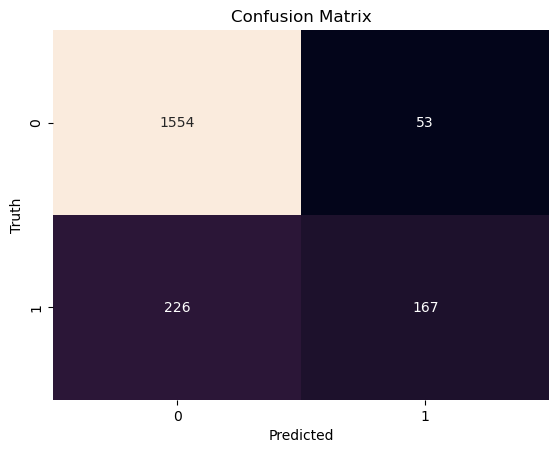

In [21]:
cm = confusion_matrix(y_test, yp)

sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()